In [3]:
from pulser import Register, Sequence, Pulse
from pulser.devices import MockDevice
from pulser.waveforms import RampWaveform
import pulser
import matplotlib.pyplot as plt

In [9]:
def set_pulse_sequence(R_ij, delta_const):
    reg = Register({
    "q0": (0, 0),
    "q1": (0, R_ij),
    })

    seq = Sequence(reg, MockDevice)
    seq.declare_channel("ch3", "rydberg_global")

    amp1 = RampWaveform(252, 0, 12.566370614359172)
    pulse1 = Pulse.ConstantDetuning(amp1, -delta_const, 0)

    det2 = RampWaveform(800, -delta_const, -delta_const)
    pulse2 = Pulse.ConstantAmplitude(12.566370614359172, det2, 0)

    amp3 = RampWaveform(500, 12.566370614359172, 0)
    pulse3 = Pulse.ConstantDetuning(amp3, -delta_const, 0)

    seq.add(pulse1, "ch3")
    seq.add(pulse2, "ch3")
    seq.add(pulse3, "ch3")
    seq.measure("ground-rydberg")

    return seq

In [ ]:
def run_experiment(backend):
    result = backend.run()
    counts = result.sample_final_state(1000)
    return counts

supge
dopge


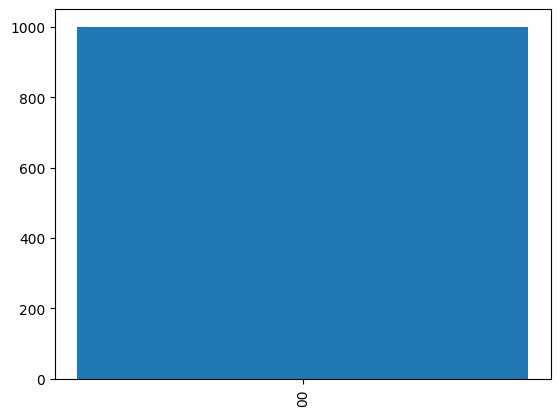

supge
dopge


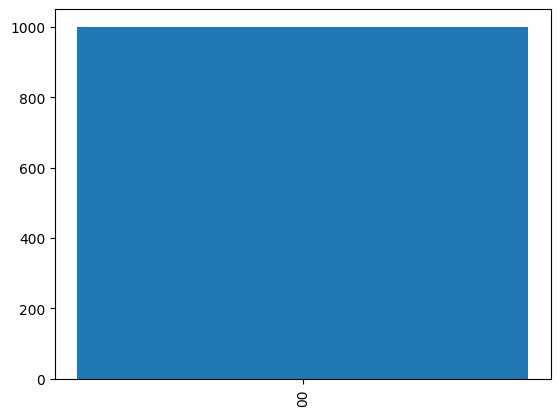

supge
dopge


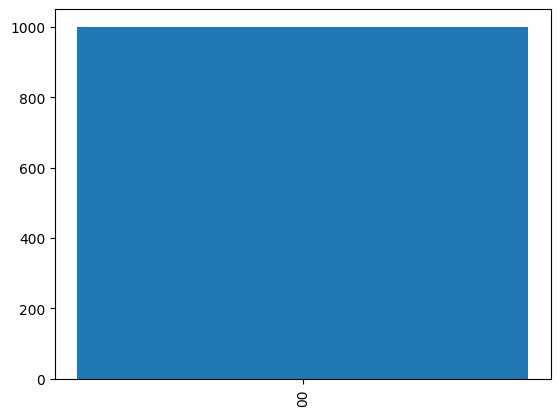

supge
dopge


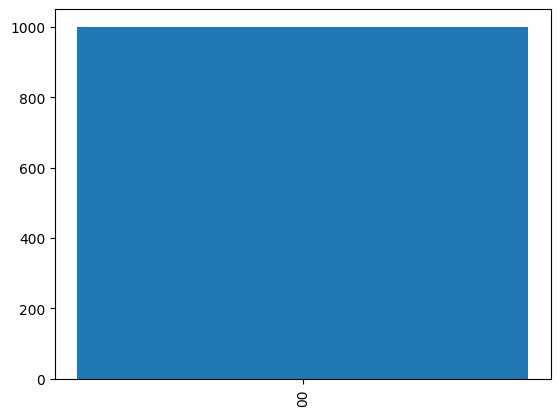

supge
dopge


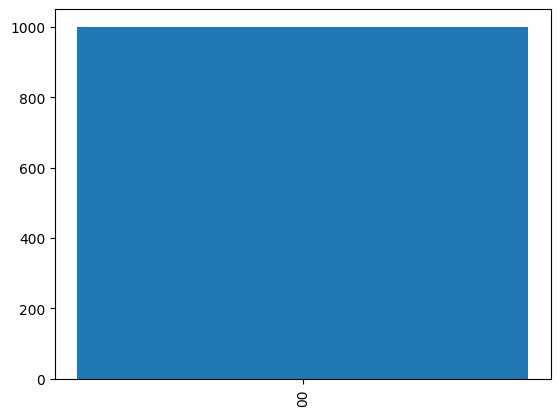

supge
dopge


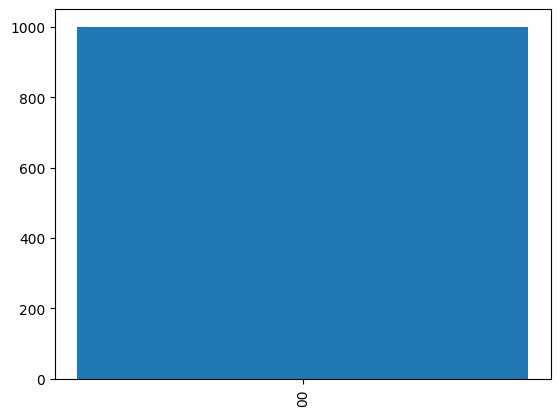

supge
dopge


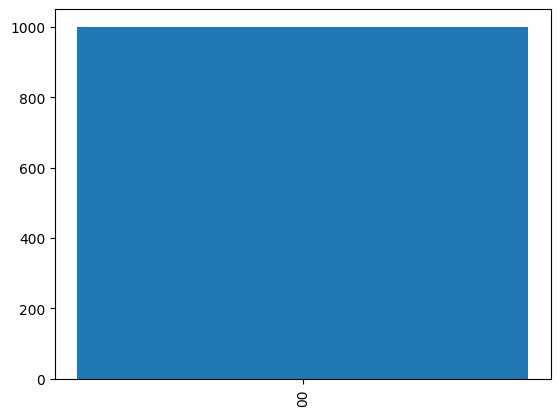

supge
dopge


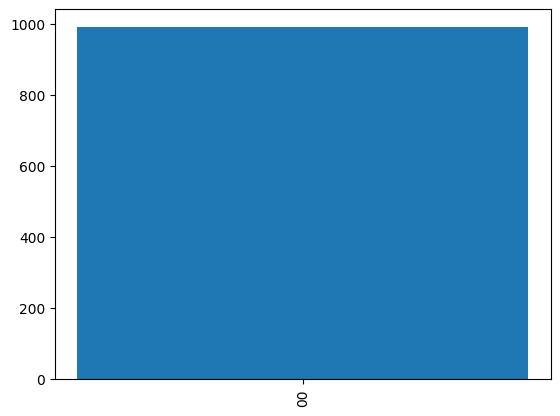

In [18]:

for i in range(1,9):
    device = MockDevice
    C_6 = device.interaction_coeff
    R_ij = i
    delta_const = C_6 / (R_ij ** 6)
    seq = set_pulse_sequence(R_ij,delta_const)
    counts = run_experiment(pulser.backends.QutipBackend(seq))
    # Let's plot the histogram associated to the measurements
    # Let's select only the states that are measured more than 10 times
    most_freq = {k: v for k, v in counts.items() if v > 10}
    plt.bar(list(most_freq.keys()), list(most_freq.values()))
    plt.xticks(rotation="vertical")
    plt.show()



In [20]:
C_6 = device.interaction_coeff
distance = 5.5
delta_const = C_6 / (distance ** 6)

In [29]:
import numpy as np

def calculate_distance_for_ratio(original_distance, interaction_ratio):
    """
    Given an original distance and the desired interaction ratio,
    compute the required new distance.
    """
    return original_distance / (interaction_ratio ** (1/6))

# Example usage:
original_d = 8
ratio = 2  # interaction is doubled
new_distance = calculate_distance_for_ratio(original_d, ratio)
print(f"New distance for double interaction: {new_distance:.4f}")


New distance for double interaction: 7.1272


R_ij : 9
8.018088463263053
6.636244616099686


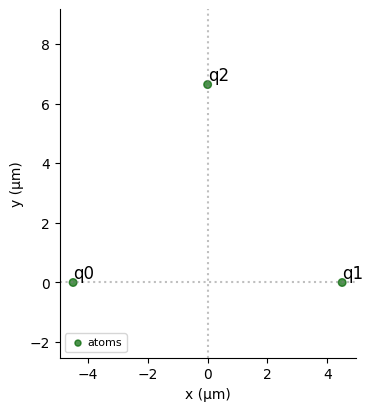

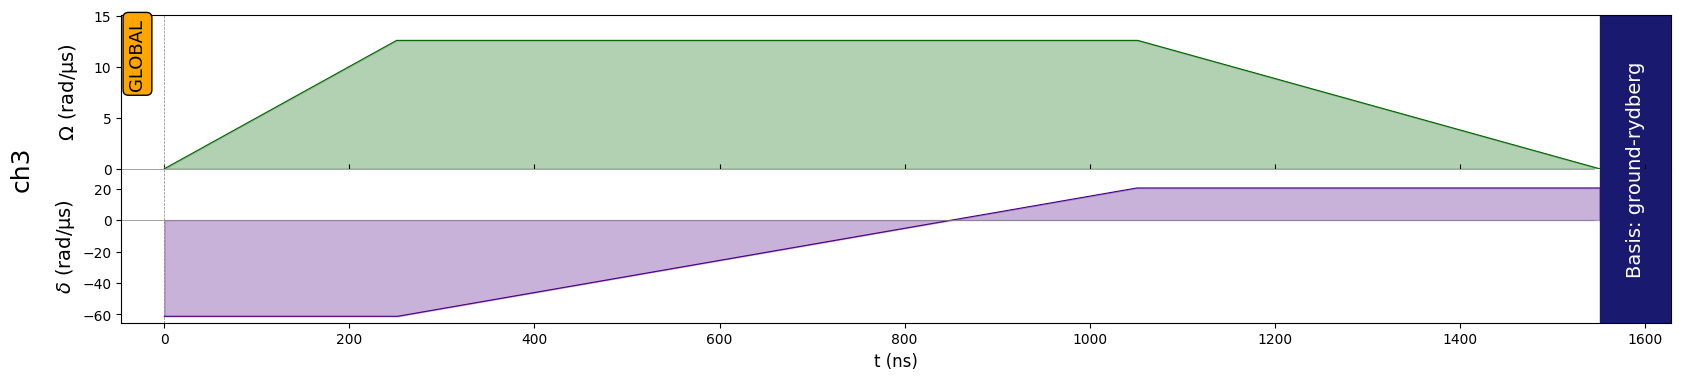

Counter({'110': 946, '010': 21, '100': 17, '001': 9, '101': 3, '011': 3, '111': 1})


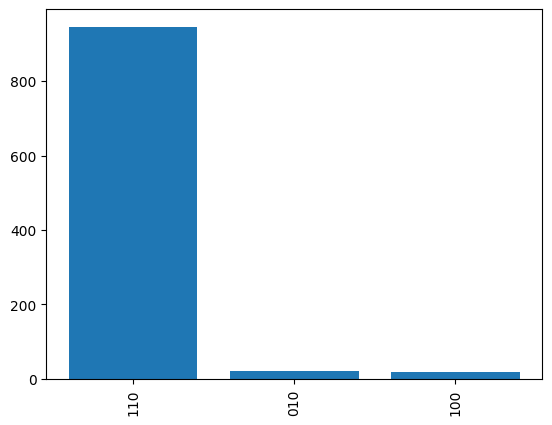

In [47]:
from pulser import Register, Sequence, Pulse
from pulser.devices import MockDevice, AnalogDevice
from pulser.waveforms import RampWaveform
import pulser
import matplotlib.pyplot as plt
import math

def get_registers(initial_d,distance2): 
    y = math.sqrt(abs((initial_d/2)**2 - distance2**2))
    print(y)
    return Register({
    "q0": (-initial_d/2, 0),
    "q1": (initial_d/2, 0),
    "q2": (0, y),
    })

def set_pulse_sequence(R_ij, C_6, device):
    delta_const = C_6 / (R_ij ** 6)
    #C_6 / (distance1 ** 6) = 0.5 * (C_6/ (distance2 ** 6))
    dist_2=(0.5*(R_ij**6))**(1/6)
    #dist_2 = 0.89089871814*R_ij
    #dist_2 = 1.12246204830*R_ij
    print(dist_2)

    reg = get_registers(R_ij,dist_2)
    reg.draw()
    seq = Sequence(reg, device)
    seq.declare_channel("ch3", "rydberg_global")
    delta_0 = -6 * delta_const
    delta_f = 2 * delta_const
    amp1 = RampWaveform(252, 0, 12.566370614359172)
    pulse1 = Pulse.ConstantDetuning(amp1, delta_0, 0)

    det2 = RampWaveform(800, delta_0, delta_f)
    pulse2 = Pulse.ConstantAmplitude(12.566370614359172, det2, 0)

    amp3 = RampWaveform(500, 12.566370614359172, 0)
    pulse3 = Pulse.ConstantDetuning(amp3, delta_f, 0)

    seq.add(pulse1, "ch3")
    seq.add(pulse2, "ch3")
    seq.add(pulse3, "ch3")
    seq.measure("ground-rydberg")

    return seq

def run_experiment(backend):
    result = backend.run()
    counts = result.sample_final_state(1000)
    return counts


device = MockDevice
C_6 = device.interaction_coeff
R_ij = 9 # distance in micrometers

print(f"R_ij : {R_ij}")

seq = set_pulse_sequence(R_ij,C_6,device)
seq.draw()
counts = run_experiment(pulser.backends.QutipBackend(seq))

# Let's plot the histogram associated to the measurements
# Let's select only the states that are measured more than 10 times
print(counts)
most_freq = {k: v for k, v in counts.items() if v > 10}
plt.bar(list(most_freq.keys()), list(most_freq.values()))
plt.xticks(rotation="vertical")
plt.show()

#(0.5*(d1**6))**(1/6)=d2**(1/6)

In [43]:
d1=5
d2=(0.5*(d1**6))**(1/6)
d2

4.454493590701696